In [1]:
import sys
print(sys.executable)

/usr/local/opt/python/bin/python3.7


In [2]:
%%bash
/usr/local/opt/python/bin/pip3 install torch torchvision

In [3]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import torch
from torch.autograd import Variable
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np
import torch.nn as nn

%matplotlib inline

In [4]:
# Test torch
x = torch.empty(5, 3)
print(x)
print(torch.rand(5, 3), torch.zeros(5, 3, dtype=torch.long), torch.tensor([5.5, 3]))
x=x.new_ones(5, 3, dtype=torch.double)  
print(x)
x=(torch.randn_like(x, dtype=torch.float) )
print(x)
y=torch.rand(5, 3)
print(x+y)
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.0000e+00, 2.5244e-29, 0.0000e+00],
        [2.5244e-29, 7.1426e+22, 4.6241e+30],
        [1.0552e+24, 5.5757e-02, 1.8728e+31],
        [1.4850e-41, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.5244e-29, 0.0000e+00]])
tensor([[0.3984, 0.0556, 0.7960],
        [0.0525, 0.9835, 0.9325],
        [0.2676, 0.7361, 0.6361],
        [0.1645, 0.4895, 0.1676],
        [0.6803, 0.1928, 0.2999]]) tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) tensor([5.5000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.5463, -1.8770, -0.7985],
        [-0.8760, -0.1432, -1.0519],
        [-1.3076,  1.8462, -0.3998],
        [ 0.7282,  0.6412, -0.4201],
        [ 0.5108, -0.3736,  0.8577]])
tensor([[ 1.5469, -1.2671, -0.1774],
        [-0.6995,  0.6316, -0.1480],
        [-0.5241,  2.5723,  0.5316],
        [ 1.5551,  1.4864, -0.0053],
        [ 1

In [5]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim, n_h):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear =nn.Sequential(nn.Linear(input_dim, n_h),
                     nn.ReLU(),
                     nn.Linear(n_h, output_dim),
                     nn.Sigmoid())
        #self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

In [6]:
def generate_dataset(size = 100):
    # equation: y = a * b 
    inputs = []
    outputs = []
    for ix in range(size):
        random_number1 = np.random.randint(size) / size
        random_number2 = np.random.randint(size) / size
        inputs.append([random_number1, random_number2])
        outputs.append([ random_number1 * random_number2])
        #inputs.append([random_number1, random_number2])
        #outputs.append([ random_number1 * random_number2])
    return inputs, outputs

In [7]:
input_dim = 2
output_dim = 1
model = LinearRegressionModel(input_dim,output_dim, 10)
loss_function = nn.MSELoss()
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)
epochs = 2000

In [8]:

for epoch in range(epochs):
    epoch +=1
    #increase the number of epochs by 1 every time
    #clear grads as discussed in prev post    
    optimiser.zero_grad()    
    x_train, y = generate_dataset(3000)
    inputs = Variable(torch.Tensor(x_train))
    labels = Variable(torch.Tensor(y))
    #forward to get predicted values    
    outputs = model.forward(inputs)
    loss = loss_function(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data))

epoch 1, loss 0.15108348429203033
epoch 2, loss 0.15111008286476135
epoch 3, loss 0.154042586684227
epoch 4, loss 0.15227599442005157
epoch 5, loss 0.15053869783878326
epoch 6, loss 0.1506279855966568
epoch 7, loss 0.154845729470253
epoch 8, loss 0.14924605190753937
epoch 9, loss 0.1520080715417862
epoch 10, loss 0.1473488062620163
epoch 11, loss 0.14799539744853973
epoch 12, loss 0.1493462771177292
epoch 13, loss 0.1519155204296112
epoch 14, loss 0.1476592868566513
epoch 15, loss 0.1514490693807602
epoch 16, loss 0.15024693310260773
epoch 17, loss 0.14866043627262115
epoch 18, loss 0.14748020470142365
epoch 19, loss 0.14784778654575348
epoch 20, loss 0.145828977227211
epoch 21, loss 0.14820416271686554
epoch 22, loss 0.1458452343940735
epoch 23, loss 0.14247913658618927
epoch 24, loss 0.14670278131961823
epoch 25, loss 0.14372552931308746
epoch 26, loss 0.14534442126750946
epoch 27, loss 0.14350615441799164
epoch 28, loss 0.1445930004119873
epoch 29, loss 0.14027993381023407
epoch 30,

epoch 240, loss 0.09413398802280426
epoch 241, loss 0.09628552943468094
epoch 242, loss 0.09604469686746597
epoch 243, loss 0.09790361672639847
epoch 244, loss 0.09438145905733109
epoch 245, loss 0.0955210030078888
epoch 246, loss 0.09613127261400223
epoch 247, loss 0.09613397717475891
epoch 248, loss 0.09462695568799973
epoch 249, loss 0.09323740750551224
epoch 250, loss 0.09577131271362305
epoch 251, loss 0.0936298817396164
epoch 252, loss 0.09528885036706924
epoch 253, loss 0.09326247870922089
epoch 254, loss 0.09329406172037125
epoch 255, loss 0.0932987853884697
epoch 256, loss 0.09454378485679626
epoch 257, loss 0.0942697525024414
epoch 258, loss 0.09342509508132935
epoch 259, loss 0.09283997118473053
epoch 260, loss 0.09652790427207947
epoch 261, loss 0.09466966986656189
epoch 262, loss 0.095299132168293
epoch 263, loss 0.09316905587911606
epoch 264, loss 0.09201756119728088
epoch 265, loss 0.09411533176898956
epoch 266, loss 0.08981364965438843
epoch 267, loss 0.0929235145449638

epoch 476, loss 0.06982544809579849
epoch 477, loss 0.07229655236005783
epoch 478, loss 0.07182145118713379
epoch 479, loss 0.07219765335321426
epoch 480, loss 0.07041104137897491
epoch 481, loss 0.07234666496515274
epoch 482, loss 0.07274343818426132
epoch 483, loss 0.0692865177989006
epoch 484, loss 0.07194657623767853
epoch 485, loss 0.07109330594539642
epoch 486, loss 0.06950265169143677
epoch 487, loss 0.07060365378856659
epoch 488, loss 0.07028897851705551
epoch 489, loss 0.07004665583372116
epoch 490, loss 0.06836006045341492
epoch 491, loss 0.07233531028032303
epoch 492, loss 0.07063186913728714
epoch 493, loss 0.07147527486085892
epoch 494, loss 0.07020767778158188
epoch 495, loss 0.07041487097740173
epoch 496, loss 0.07005490362644196
epoch 497, loss 0.06991701573133469
epoch 498, loss 0.07041246443986893
epoch 499, loss 0.06848966330289841
epoch 500, loss 0.0674620270729065
epoch 501, loss 0.07050452381372452
epoch 502, loss 0.0699533000588417
epoch 503, loss 0.0691151469945

epoch 705, loss 0.06118914112448692
epoch 706, loss 0.05998220294713974
epoch 707, loss 0.0578736811876297
epoch 708, loss 0.060333337634801865
epoch 709, loss 0.05982174724340439
epoch 710, loss 0.062199629843235016
epoch 711, loss 0.06082361564040184
epoch 712, loss 0.060179103165864944
epoch 713, loss 0.06160002201795578
epoch 714, loss 0.06064373254776001
epoch 715, loss 0.06080908328294754
epoch 716, loss 0.06050841882824898
epoch 717, loss 0.061070263385772705
epoch 718, loss 0.0608036182820797
epoch 719, loss 0.06017155200242996
epoch 720, loss 0.05993927642703056
epoch 721, loss 0.0598626583814621
epoch 722, loss 0.05990422144532204
epoch 723, loss 0.06091815605759621
epoch 724, loss 0.06015671789646149
epoch 725, loss 0.06078094616532326
epoch 726, loss 0.06137771159410477
epoch 727, loss 0.0603124275803566
epoch 728, loss 0.058910220861434937
epoch 729, loss 0.0615089125931263
epoch 730, loss 0.0592624805867672
epoch 731, loss 0.06087334826588631
epoch 732, loss 0.06068753078

epoch 936, loss 0.056088611483573914
epoch 937, loss 0.054766055196523666
epoch 938, loss 0.055935803800821304
epoch 939, loss 0.05608198419213295
epoch 940, loss 0.055374376475811005
epoch 941, loss 0.05607571452856064
epoch 942, loss 0.05533276125788689
epoch 943, loss 0.055040109902620316
epoch 944, loss 0.056784991174936295
epoch 945, loss 0.05893022194504738
epoch 946, loss 0.05580612272024155
epoch 947, loss 0.05660513415932655
epoch 948, loss 0.056327205151319504
epoch 949, loss 0.05469483137130737
epoch 950, loss 0.05738946422934532
epoch 951, loss 0.058642201125621796
epoch 952, loss 0.0553121380507946
epoch 953, loss 0.05828744173049927
epoch 954, loss 0.056321196258068085
epoch 955, loss 0.05656856298446655
epoch 956, loss 0.057706963270902634
epoch 957, loss 0.05660861358046532
epoch 958, loss 0.05593245476484299
epoch 959, loss 0.05404724180698395
epoch 960, loss 0.05588744953274727
epoch 961, loss 0.05707907676696777
epoch 962, loss 0.05515795201063156
epoch 963, loss 0.0

epoch 1162, loss 0.054841507226228714
epoch 1163, loss 0.05550311505794525
epoch 1164, loss 0.05219338461756706
epoch 1165, loss 0.05267266929149628
epoch 1166, loss 0.05330384522676468
epoch 1167, loss 0.053287312388420105
epoch 1168, loss 0.05355106294155121
epoch 1169, loss 0.053134482353925705
epoch 1170, loss 0.05510561913251877
epoch 1171, loss 0.05609700456261635
epoch 1172, loss 0.053777508437633514
epoch 1173, loss 0.05605875700712204
epoch 1174, loss 0.05351543426513672
epoch 1175, loss 0.055309098213911057
epoch 1176, loss 0.05373455584049225
epoch 1177, loss 0.05236206203699112
epoch 1178, loss 0.05429121479392052
epoch 1179, loss 0.05439760535955429
epoch 1180, loss 0.053766895085573196
epoch 1181, loss 0.0536591112613678
epoch 1182, loss 0.053925953805446625
epoch 1183, loss 0.05313161760568619
epoch 1184, loss 0.05345403775572777
epoch 1185, loss 0.05286010354757309
epoch 1186, loss 0.05406641960144043
epoch 1187, loss 0.05570296570658684
epoch 1188, loss 0.0535662397742

epoch 1382, loss 0.05192749574780464
epoch 1383, loss 0.05297072231769562
epoch 1384, loss 0.05159543827176094
epoch 1385, loss 0.05368126556277275
epoch 1386, loss 0.05098799616098404
epoch 1387, loss 0.05480213835835457
epoch 1388, loss 0.05159689486026764
epoch 1389, loss 0.05153237283229828
epoch 1390, loss 0.05131586268544197
epoch 1391, loss 0.05169170722365379
epoch 1392, loss 0.052780214697122574
epoch 1393, loss 0.05274133011698723
epoch 1394, loss 0.052013617008924484
epoch 1395, loss 0.05329502373933792
epoch 1396, loss 0.051365144550800323
epoch 1397, loss 0.054372355341911316
epoch 1398, loss 0.05260942876338959
epoch 1399, loss 0.05148681253194809
epoch 1400, loss 0.05190432444214821
epoch 1401, loss 0.0529460608959198
epoch 1402, loss 0.05141431838274002
epoch 1403, loss 0.05010080710053444
epoch 1404, loss 0.05224376916885376
epoch 1405, loss 0.051585424691438675
epoch 1406, loss 0.0508996918797493
epoch 1407, loss 0.05392623320221901
epoch 1408, loss 0.0504314787685871

epoch 1602, loss 0.04954295977950096
epoch 1603, loss 0.05159323662519455
epoch 1604, loss 0.05291830003261566
epoch 1605, loss 0.052538786083459854
epoch 1606, loss 0.049999725073575974
epoch 1607, loss 0.04883408546447754
epoch 1608, loss 0.05173535645008087
epoch 1609, loss 0.050804685801267624
epoch 1610, loss 0.04970242828130722
epoch 1611, loss 0.05263806879520416
epoch 1612, loss 0.05096207186579704
epoch 1613, loss 0.051117561757564545
epoch 1614, loss 0.050405461341142654
epoch 1615, loss 0.04913577064871788
epoch 1616, loss 0.0508279986679554
epoch 1617, loss 0.05084148794412613
epoch 1618, loss 0.050714291632175446
epoch 1619, loss 0.051522672176361084
epoch 1620, loss 0.049152620136737823
epoch 1621, loss 0.051974643021821976
epoch 1622, loss 0.04961409047245979
epoch 1623, loss 0.05188533291220665
epoch 1624, loss 0.05137554928660393
epoch 1625, loss 0.05019966885447502
epoch 1626, loss 0.048882629722356796
epoch 1627, loss 0.04920594394207001
epoch 1628, loss 0.0512132458

epoch 1825, loss 0.05107893794775009
epoch 1826, loss 0.05044417455792427
epoch 1827, loss 0.05000051483511925
epoch 1828, loss 0.05115365982055664
epoch 1829, loss 0.04942416399717331
epoch 1830, loss 0.049860697239637375
epoch 1831, loss 0.05023999139666557
epoch 1832, loss 0.04968312010169029
epoch 1833, loss 0.0506865456700325
epoch 1834, loss 0.0496562235057354
epoch 1835, loss 0.04915329068899155
epoch 1836, loss 0.050402477383613586
epoch 1837, loss 0.05139488726854324
epoch 1838, loss 0.04912368953227997
epoch 1839, loss 0.05230028182268143
epoch 1840, loss 0.051746878772974014
epoch 1841, loss 0.05076693370938301
epoch 1842, loss 0.05139978975057602
epoch 1843, loss 0.05146828293800354
epoch 1844, loss 0.05091596394777298
epoch 1845, loss 0.051458194851875305
epoch 1846, loss 0.050389643758535385
epoch 1847, loss 0.05035223439335823
epoch 1848, loss 0.050030168145895004
epoch 1849, loss 0.05246329307556152
epoch 1850, loss 0.05052514374256134
epoch 1851, loss 0.051028259098529

In [9]:

predicted =model.forward(inputs).data.numpy()

Text(0.5, 0, 'Z Label')

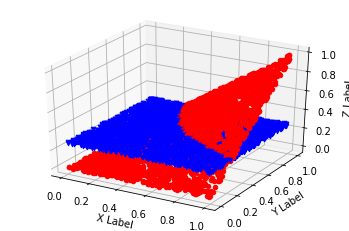

In [10]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
j=0
for i in x_train:
    xs = i[0]
    ys= i[1]
    ax.scatter(xs, ys, y[j], c='r', marker='o')
    ax.scatter(xs, ys, predicted[j], c='b', marker='v')
    j = j +1

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

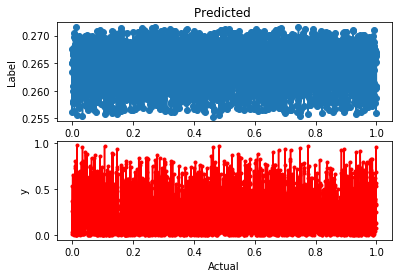

In [11]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 1.0,3000)

y1 = y
y2 = predicted

plt.subplot(2, 1, 1)
plt.plot(x1, y2, 'o-')
plt.title('Predicted ')
plt.ylabel('Label')

plt.subplot(2, 1, 2)
plt.plot(x1, y1, '.-', c='r')
plt.xlabel('Actual')
plt.ylabel('y')

plt.show()

In [12]:
model.forward(Variable(torch.Tensor([2.0/100,2.0/100]))).data

tensor([0.2683])

In [13]:
.2/100*.2/100

4e-06

In [15]:
%%bash
pwd

/Users/bala/study/nlp/2nd-assign
